In [1]:
using DelimitedFiles, HDF5, FileIO
using Plots, Rsvg, LaTeXStrings, AverageShiftedHistograms, StatPlots
using Chemfiles, JUMD, DataStructures
using LinearAlgebra, Statistics
home = "/home/pbarletta/labo/18/lbp/run"
rtdos = "/home/pbarletta/labo/18/lbp/rtdos_log"
pyplot()

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1189
┌ Info: Recompiling stale cache file /home/pbarletta/.julia/compiled/v1.0/JUMD.ji for JUMD [top-level]
└ @ Base loading.jl:1187


Plots.PyPlotBackend()

### Lee modos, volumen original y  volúmenes NDD. Obtiene VGV

In [2]:
pdb = "4xcp"
# Leo modos
modes_4xcp, evals_4xcp = JUMD.read_ptraj_modes(
    joinpath(home, pdb,  "pca", string("full_modes_", pdb)))

# AAs
aa3 = convert(Int64, length(evals_4xcp))
aa = convert(Int64, aa3 / 3)

# Leo volumen de la traj
trj_vol = convert(Array{Float64, 1}, 
    readdlm(joinpath(home, pdb, "cavidad", string("vol_trj_", pdb)))[:, 3]);
nframes = length(trj_vol)

# Leo volúmene del average
vol_avg_4xcp = convert(Float64, readdlm(joinpath(home, pdb,  "ndd", string("vol_avg_", pdb)))[3])

# Leo volúmenes NDD
ndd_out_4xcp = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb,  "ndd", string("out_ndd_", pdb)))[2:end, 2])

# VGV
vgv_4xcp = (ndd_out_4xcp .- vol_avg_4xcp) .* evals_4xcp
vgv_4xcp = vgv_4xcp ./ norm(vgv_4xcp);

### Full

### Vol 1

### Vol 2

### Vol 3

## Data cleaning

#### Full

In [3]:
header_contactos_full = h5read(joinpath(home, pdb, "cont", "full", "header_ctcto.h5"), "headers")
trj_contactos_full = h5read(joinpath(home, pdb, "cont", "full", "ctcto.h5"), "contactos");
nctc = length(header_contactos_full)

full_prt_res = Array{Int64, 1}(undef, nctc)
full_prt_atm = Array{String, 1}(undef, nctc)
full_lig_atm = Array{String, 1}(undef, nctc);

for i in eachindex(header_contactos_full)
    tmp = split(header_contactos_full[i], "@")

    full_prt_res[i] = parse(Int64, tmp[1][2:end])
    full_prt_atm[i] = convert(String, split(tmp[2], "_")[1])
    full_lig_atm[i] = convert(String, tmp[end])
end

#### V1

In [4]:
header_contactos_v1 = h5read(joinpath(home, pdb, "cont", "v1", "header_ctcto.h5"), "headers")
trj_contactos_v1 = h5read(joinpath(home, pdb, "cont", "v1", "ctcto.h5"), "contactos");
nctc = length(header_contactos_v1)

v1_prt_res = Array{Int64, 1}(undef, nctc)
v1_prt_atm = Array{String, 1}(undef, nctc)
v1_lig_atm = Array{String, 1}(undef, nctc);

for i in eachindex(header_contactos_v1)
    tmp = split(header_contactos_v1[i], "@")

    v1_prt_res[i] = parse(Int64, tmp[1][2:end])
    v1_prt_atm[i] = convert(String, split(tmp[2], "_")[1])
    v1_lig_atm[i] = convert(String, tmp[end])
end

#### V2

In [5]:
header_contactos_v2 = h5read(joinpath(home, pdb, "cont", "v2", "header_ctcto.h5"), "headers")
trj_contactos_v2 = h5read(joinpath(home, pdb, "cont", "v2", "ctcto.h5"), "contactos");
nctc = length(header_contactos_v2)

v2_prt_res = Array{Int64, 1}(undef, nctc)
v2_prt_atm = Array{String, 1}(undef, nctc)
v2_lig_atm = Array{String, 1}(undef, nctc);

for i in eachindex(header_contactos_v2)
    tmp = split(header_contactos_v2[i], "@")

    v2_prt_res[i] = parse(Int64, tmp[1][2:end])
    v2_prt_atm[i] = convert(String, split(tmp[2], "_")[1])
    v2_lig_atm[i] = convert(String, tmp[end])
end

#### V3

In [6]:
header_contactos_v3 = h5read(joinpath(home, pdb, "cont", "v3", "header_ctcto.h5"), "headers")
trj_contactos_v3 = h5read(joinpath(home, pdb, "cont", "v3", "ctcto.h5"), "contactos");
nctc = length(header_contactos_v3)

v3_prt_res = Array{Int64, 1}(undef, nctc)
v3_prt_atm = Array{String, 1}(undef, nctc)
v3_lig_atm = Array{String, 1}(undef, nctc);

for i in eachindex(header_contactos_v3)
    tmp = split(header_contactos_v3[i], "@")

    v3_prt_res[i] = parse(Int64, tmp[1][2:end])
    v3_prt_atm[i] = convert(String, split(tmp[2], "_")[1])
    v3_lig_atm[i] = convert(String, tmp[end])
end

# Analizo

## Según proteína

In [7]:
name_res_full, freq_res_full, ids_res_full = JUMD.contarIndexar(full_prt_res)
name_res_v1, freq_res_v1, ids_res_v1 = JUMD.contarIndexar(v1_prt_res)
name_res_v2, freq_res_v2, ids_res_v2 = JUMD.contarIndexar(v2_prt_res)
name_res_v3, freq_res_v3, ids_res_v3 = JUMD.contarIndexar(v3_prt_res)

dens_tot_full = sum(trj_contactos_full)
dens_tot_v1 = sum(trj_contactos_v1)
dens_tot_v2 = sum(trj_contactos_v2)
dens_tot_v3 = sum(trj_contactos_v3)

495124

### Obtengo densidad/frecuencia de contacto entre el res y el lig.

In [9]:
mask = collect(1:154);

dens_full = fill(0., length(mask))
k = 1
for i in eachindex(name_res_full)
    while name_res_full[i] != mask[k]
        k+=1
    end
    dens_full[k] = sum(trj_contactos_full[:, ids_res_full[i]])
end
dens_full = dens_full ./ dens_tot_full

dens_v1 = fill(0., length(mask))
k = 1
for i in eachindex(name_res_v1)
    while name_res_v1[i] != mask[k]
        k+=1
    end
    dens_v1[k] = sum(trj_contactos_v1[:, ids_res_v1[i]])
end
dens_v1 = dens_v1 ./ dens_tot_v1

dens_v2 = fill(0., length(mask))
k = 1
for i in eachindex(name_res_v2)
    while name_res_v2[i] != mask[k]
        k+=1
    end
    dens_v2[k] = sum(trj_contactos_v2[:, ids_res_v2[i]])
end
dens_v2 = dens_v2 ./ dens_tot_v2

dens_v3 = fill(0., length(mask))
k = 1
for i in eachindex(name_res_v3)
    while name_res_v3[i] != mask[k]
        k+=1
    end
    dens_v3[k] = sum(trj_contactos_v3[:, ids_res_v3[i]])
end
dens_v3 = dens_v3 ./ dens_tot_v3;

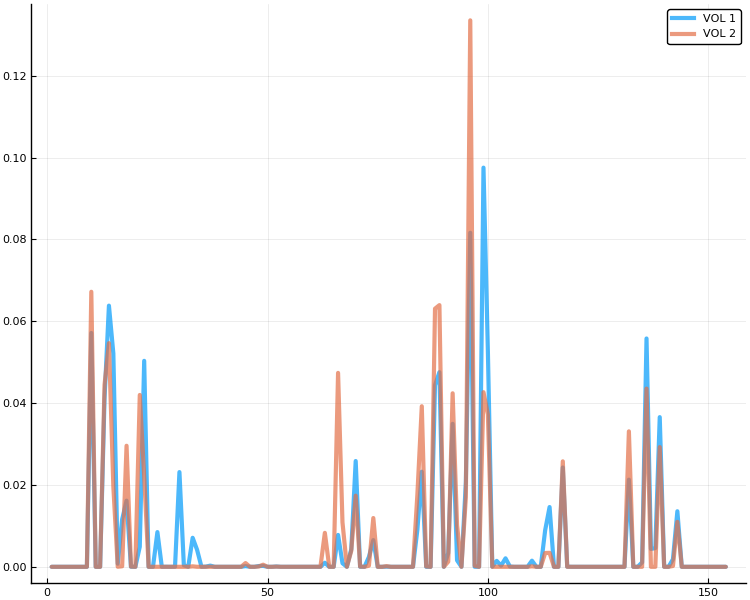

In [10]:
plot(mask, dens_v1,
    lw = 3, linealpha = .7, size = (750, 600), label = "VOL 1")
plot!(mask, dens_v2,
    lw = 3, linealpha = .7, label = "VOL 2")

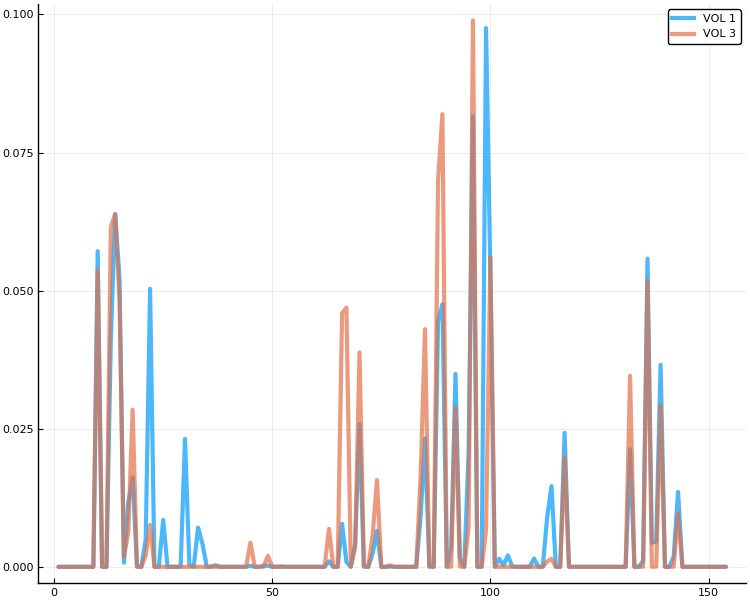

In [11]:
plot(mask, dens_v1,
    lw = 3, linealpha = .7, size = (750, 600), label = "VOL 1")
plot!(mask, dens_v3,
    lw = 3, linealpha = .7, label = "VOL 3")

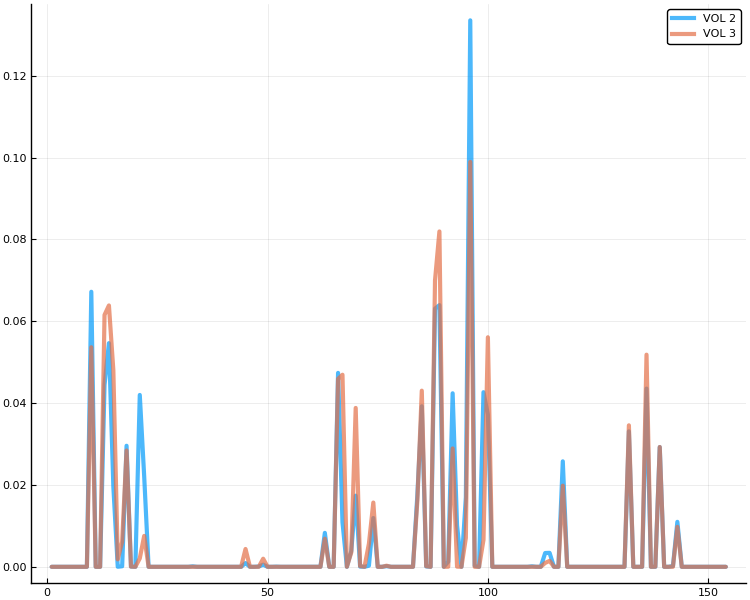

In [12]:
plot(mask, dens_v2,
    lw = 3, linealpha = .7, size = (750, 600), label = "VOL 2")
plot!(mask, dens_v3,
    lw = 3, linealpha = .7, label = "VOL 3")

#### Top20 residuos en contacto con el lig

In [13]:
top_dens_v1 = sortperm(dens_v1, rev = true)[1:20]
top_dens_v2 = sortperm(dens_v2, rev = true)[1:20]
top_dens_v3 = sortperm(dens_v3, rev = true)[1:20]

# P/ pymol:
replace(string(top_dens_v1), ", " => "+")[2:end-1]
replace(string(top_dens_v2), ", " => "+")[2:end-1]
replace(string(top_dens_v3), ", " => "+")[2:end-1]

# P/ graficar acá:
max_dens_v1 = dens_v1[dens_v1 .>= dens_v1[top_dens_v1[end]]]
max_dens_v2 = dens_v1[dens_v2 .>= dens_v2[top_dens_v2[end]]]
max_dens_v3 = dens_v1[dens_v3 .>= dens_v3[top_dens_v3[end]]];

idx_v1 = sortperm(top_dens_v1)
idx_v2 = sortperm(top_dens_v2)
idx_v3 = sortperm(top_dens_v3);

#
templ_v1 = fill(0., length(mask))
templ_v1[top_dens_v1] = max_dens_v1
#
templ_v2 = fill(0., length(mask))
templ_v2[top_dens_v2] = max_dens_v2
#
templ_v3 = fill(0., length(mask))
templ_v3[top_dens_v3] = max_dens_v3;

#
prin = 1:35
fin = 60:144

60:144

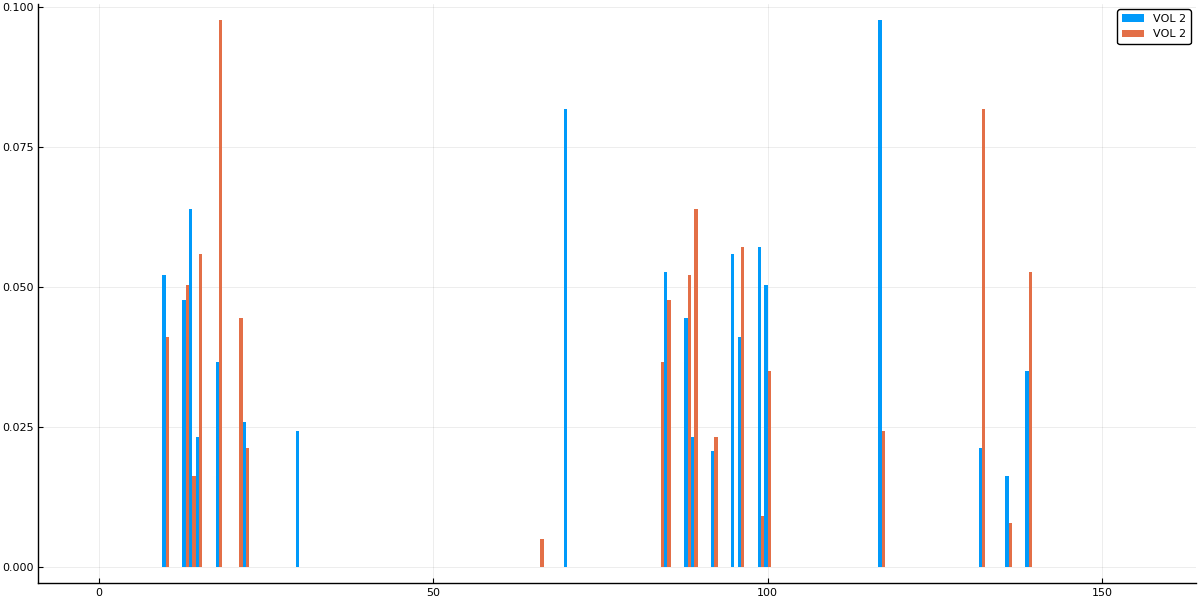

In [14]:
groupedbar(hcat(templ_v1, templ_v2),
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

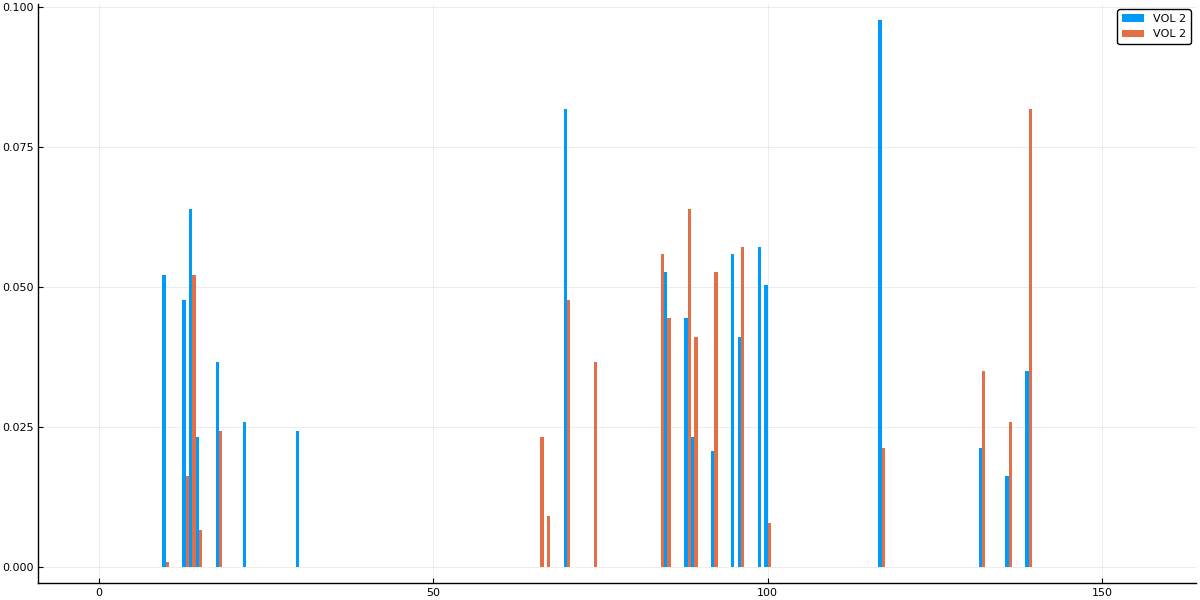

In [15]:
groupedbar(hcat(templ_v1, templ_v3),
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

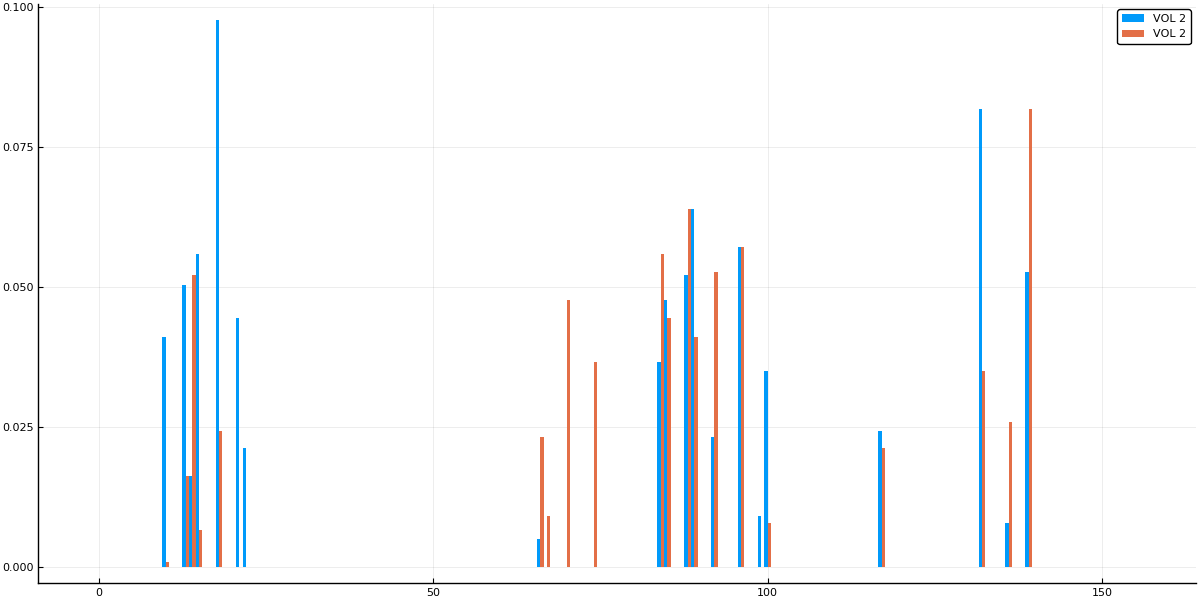

In [16]:
groupedbar(hcat(templ_v2, templ_v3),
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

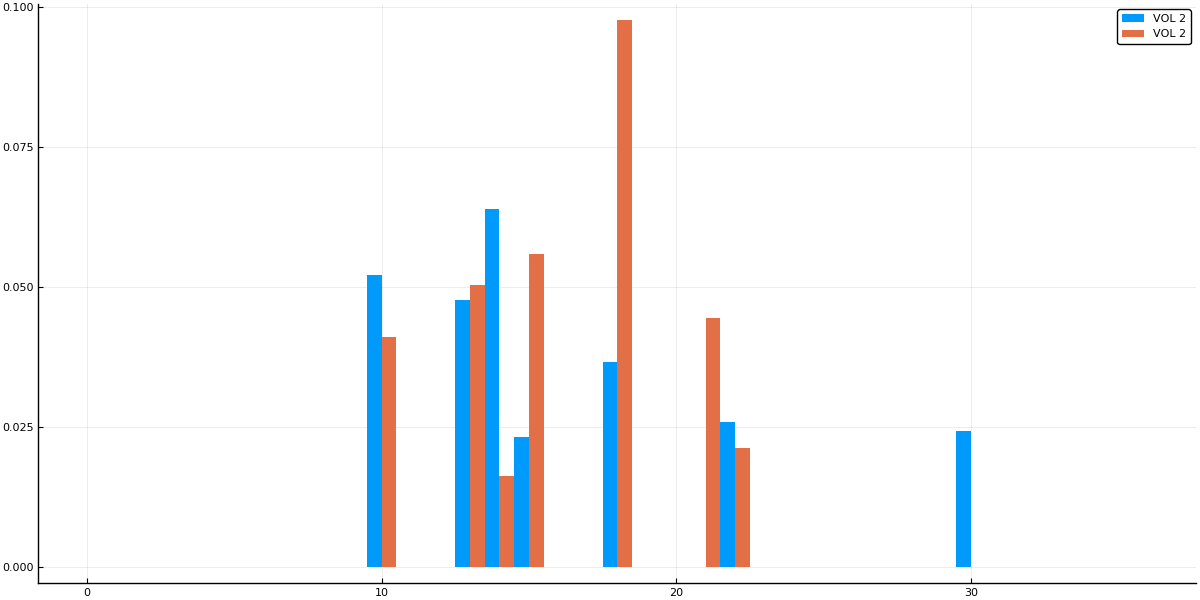

In [17]:
groupedbar(hcat(templ_v1, templ_v2)[prin, :],
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

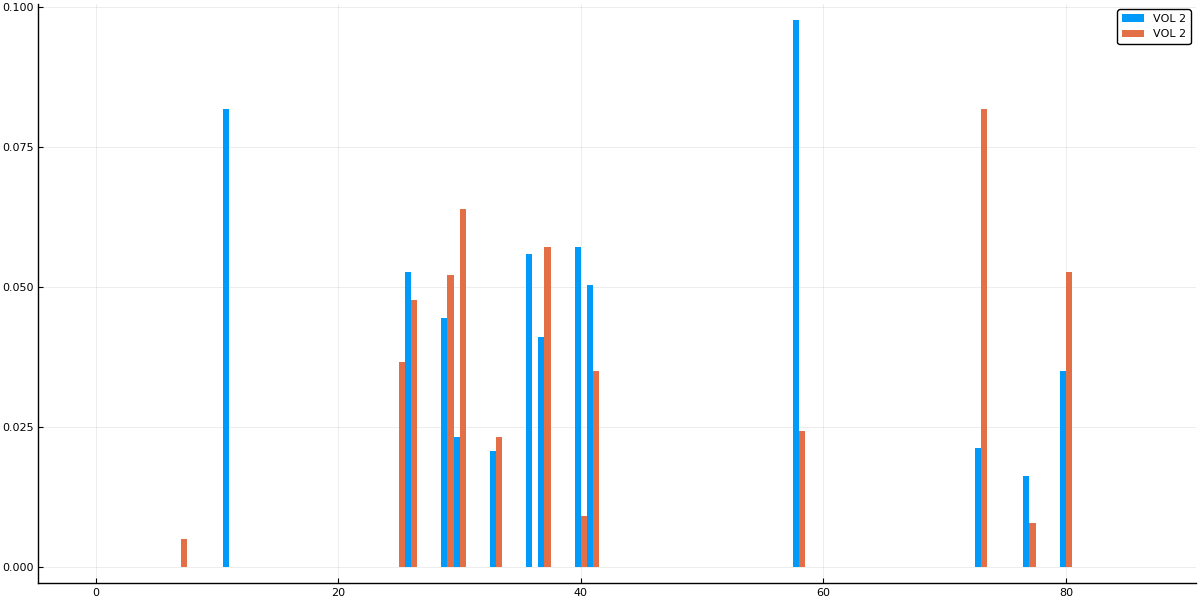

In [18]:
groupedbar(hcat(templ_v1, templ_v2)[fin, :],
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

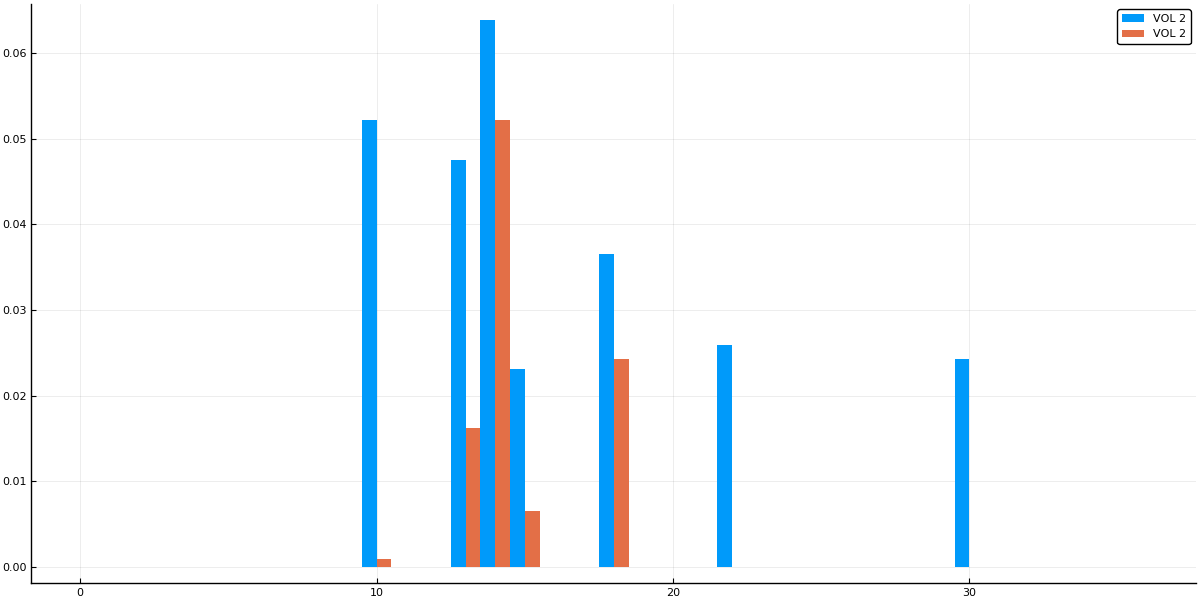

In [19]:
groupedbar(hcat(templ_v1, templ_v3)[prin, :],
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

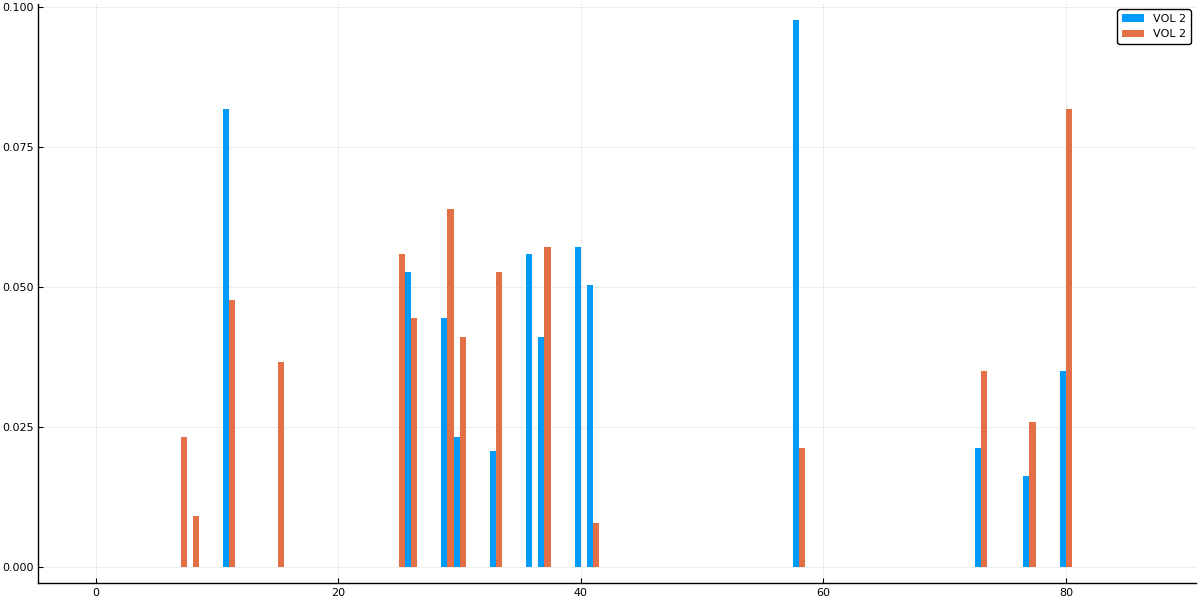

In [20]:
groupedbar(hcat(templ_v1, templ_v3)[fin, :],
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

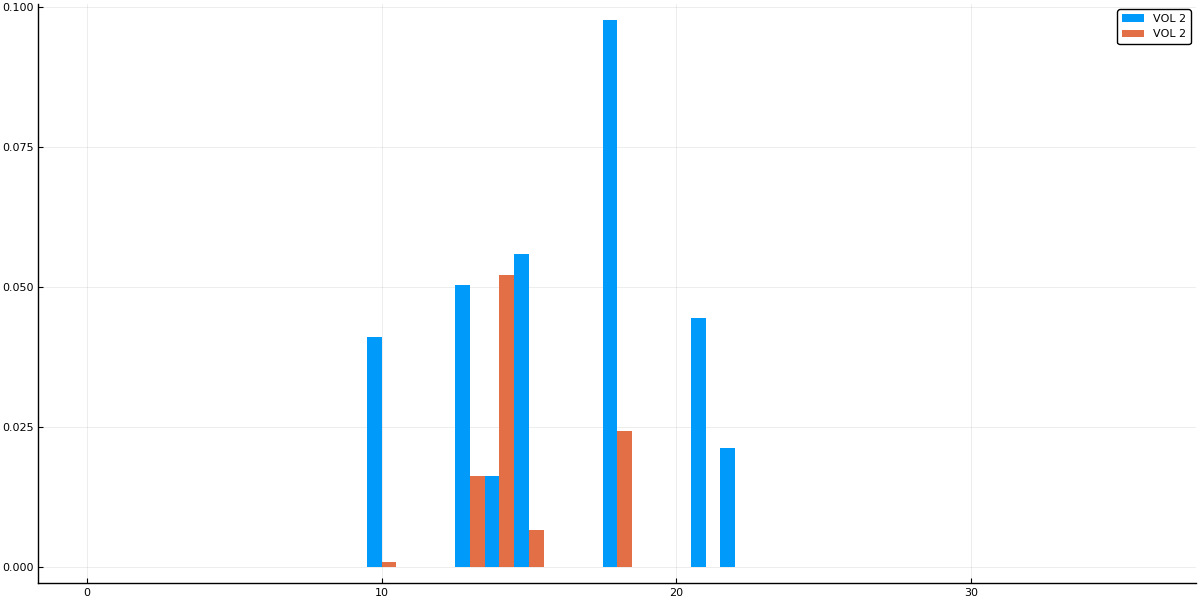

In [21]:
groupedbar(hcat(templ_v2, templ_v3)[prin, :],
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

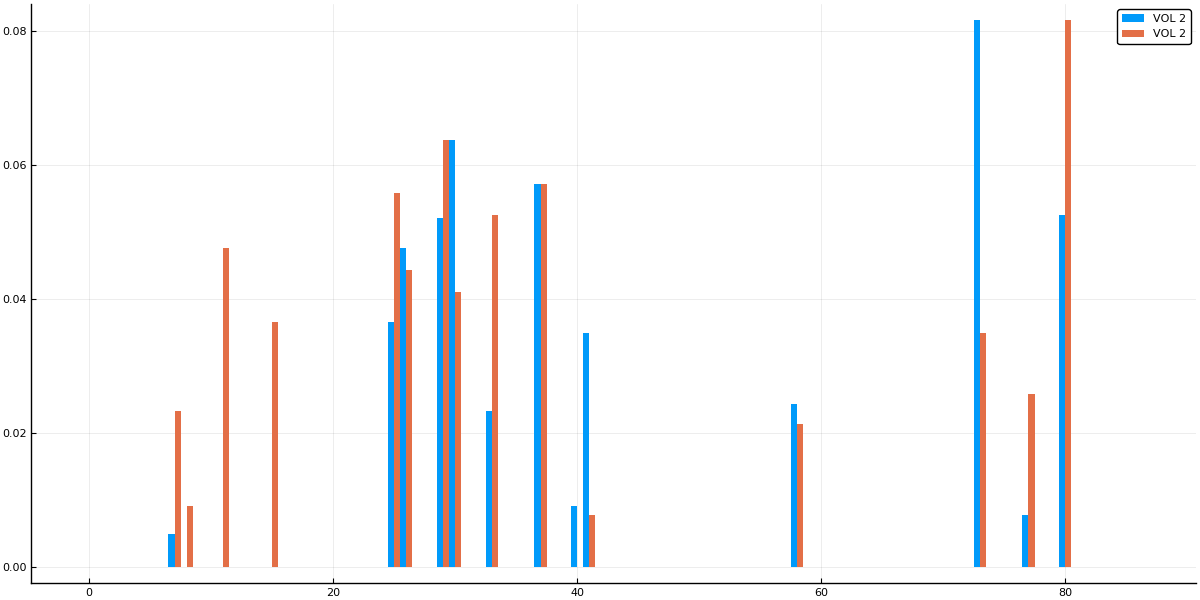

In [22]:
groupedbar(hcat(templ_v2, templ_v3)[fin, :],
    bar_position = :dodge, linecolor = false, size = (1200, 600), label = "VOL 2",
    bar_width = 1)

## Según ligando

In [62]:
name_lig_full, freq_lig_full, ids_lig_full = JUMD.contarIndexar(full_lig_atm)
name_lig_v1, freq_lig_v1, ids_lig_v1 = JUMD.contarIndexar(v1_lig_atm)
name_lig_v2, freq_lig_v2, ids_lig_v2 = JUMD.contarIndexar(v2_lig_atm)
name_lig_v3, freq_lig_v3, ids_lig_v3 = JUMD.contarIndexar(v3_lig_atm);

# Reordeno a mi gusto
name_lig_full = append!(name_lig_full[end-1:end], name_lig_full[1:end-2])
name_lig_v1 = append!(name_lig_v1[end-1:end], name_lig_v1[1:end-2])
name_lig_v2 = append!(name_lig_v2[end-1:end], name_lig_v2[1:end-2])
name_lig_v3 = append!(name_lig_v3[end-1:end], name_lig_v3[1:end-2])

freq_lig_full = append!(freq_lig_full[end-1:end], freq_lig_full[1:end-2])
freq_lig_v1 = append!(freq_lig_v1[end-1:end], freq_lig_v1[1:end-2])
freq_lig_v2 = append!(freq_lig_v2[end-1:end], freq_lig_v2[1:end-2])
freq_lig_v3 = append!(freq_lig_v3[end-1:end], freq_lig_v3[1:end-2])

ids_lig_full = append!(ids_lig_full[end-1:end], ids_lig_full[1:end-2])
ids_lig_v1 = append!(ids_lig_v1[end-1:end], ids_lig_v1[1:end-2])
ids_lig_v2 = append!(ids_lig_v2[end-1:end], ids_lig_v2[1:end-2])
ids_lig_v3 = append!(ids_lig_v3[end-1:end], ids_lig_v3[1:end-2])


# Armo diccionarios p/ después indexar más lindo
dic_lig_full = Dict(zip(name_lig_full, ids_lig_full))
dic_lig_v1 = Dict(zip(name_lig_v1, ids_lig_v1))
dic_lig_v2 = Dict(zip(name_lig_v2, ids_lig_v2))
dic_lig_v3 = Dict(zip(name_lig_v3, ids_lig_v3))

# Agrupo por sección del ligando 

# Head
head_full = [ dic_lig_full["O1"] ; dic_lig_full["O2"] ; dic_lig_full["C1"] ;
    dic_lig_full["C2"] ]
head_v1 = [ dic_lig_v1["O1"] ; dic_lig_v1["O2"] ; dic_lig_v1["C1"] ; dic_lig_v1["C2"] ]
head_v2 = [ dic_lig_v2["O1"] ; dic_lig_v2["O2"] ; dic_lig_v2["C1"] ; dic_lig_v2["C2"] ]
head_v3 = [ dic_lig_v3["O1"] ; dic_lig_v3["O2"] ; dic_lig_v3["C1"] ; dic_lig_v3["C2"] ]

# Body
body_full = [ dic_lig_full["C3"] ; dic_lig_full["C4"]  ; dic_lig_full["C5"]  ;
    dic_lig_full["C6"]  ; dic_lig_full["C7"]  ; dic_lig_full["C8"]  ; 
    dic_lig_full["C9"]  ; dic_lig_full["CA"] ; dic_lig_full["CB"]  ;
    dic_lig_full["CC"]  ; dic_lig_full["CD"] ] 
body_v1 = [ dic_lig_v1["C3"] ; dic_lig_v1["C4"]  ; dic_lig_v1["C5"]  ;
    dic_lig_v1["C6"]  ; dic_lig_v1["C7"]  ; dic_lig_v1["C8"]  ; 
    dic_lig_v1["C9"]  ; dic_lig_v1["CA"] ; dic_lig_v1["CB"]  ;
    dic_lig_v1["CC"]  ; dic_lig_v1["CD"] ]
body_v2 = [ dic_lig_v2["C3"] ; dic_lig_v2["C4"]  ; dic_lig_v2["C5"]  ;
    dic_lig_v2["C6"]  ; dic_lig_v2["C7"]  ; dic_lig_v2["C8"]  ;
    dic_lig_v2["C9"]  ; dic_lig_v2["CA"] ; dic_lig_v2["CB"]  ;
    dic_lig_v2["CC"]  ; dic_lig_v2["CD"] ]
body_v3 = [ dic_lig_v3["C3"] ; dic_lig_v3["C4"]  ; dic_lig_v3["C5"]  ;
    dic_lig_v3["C6"]  ; dic_lig_v3["C7"]  ; dic_lig_v3["C8"]  ;
    dic_lig_v3["C9"]  ; dic_lig_v3["CA"] ; dic_lig_v3["CB"]  ;
    dic_lig_v3["CC"]  ; dic_lig_v3["CD"] ]

# Tail
tail_full = [ dic_lig_full["CE"] ; dic_lig_full["CF"] ; dic_lig_full["CG"] ]
tail_v1 = [ dic_lig_v1["CE"] ; dic_lig_v1["CF"] ; dic_lig_v1["CG"] ]
tail_v2 = [ dic_lig_v2["CE"] ; dic_lig_v2["CF"] ; dic_lig_v2["CG"] ]
tail_v3 = [ dic_lig_v3["CE"] ; dic_lig_v3["CF"] ; dic_lig_v3["CG"] ];

### Obtengo densidad/frecuencia de contacto entre las zonas del ligando y la proteína

In [63]:
dens_head_full = sum(trj_contactos_full[:, head_full]) ./ dens_tot_full
dens_body_full = sum(trj_contactos_full[:, body_full]) ./ dens_tot_full
dens_tail_full = sum(trj_contactos_full[:, tail_full]) ./ dens_tot_full
dens_lig_full = [ dens_head_full ; dens_body_full ; dens_tail_full ]

dens_head_v1 = sum(trj_contactos_v1[:, head_v1]) ./ dens_tot_v1
dens_body_v1 = sum(trj_contactos_v1[:, body_v1]) ./ dens_tot_v1
dens_tail_v1 = sum(trj_contactos_v1[:, tail_v1]) ./ dens_tot_v1
dens_lig_v1 = [ dens_head_v1 ; dens_body_v1 ; dens_tail_v1 ]

dens_head_v2 = sum(trj_contactos_v2[:, head_v2]) ./ dens_tot_v2
dens_body_v2 = sum(trj_contactos_v2[:, body_v2]) ./ dens_tot_v2
dens_tail_v2 = sum(trj_contactos_v2[:, tail_v2]) ./ dens_tot_v2
dens_lig_v2 = [ dens_head_v2 ; dens_body_v2 ; dens_tail_v2 ]

dens_head_v3 = sum(trj_contactos_v3[:, head_v3]) ./ dens_tot_v3
dens_body_v3 = sum(trj_contactos_v3[:, body_v3]) ./ dens_tot_v3
dens_tail_v3 = sum(trj_contactos_v3[:, tail_v3]) ./ dens_tot_v3
dens_lig_v3 = [ dens_head_v3 ; dens_body_v3 ; dens_tail_v3 ];

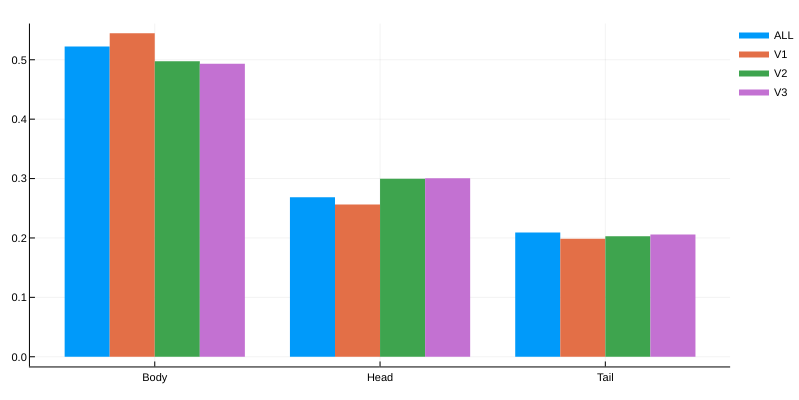

In [64]:
x_lig = repeat(["Head" ; "Body" ; "Tail"], outer = 4)
g_lig = repeat(["ALL" ; "V1" ; "V2" ; "V3"], inner = 3)

groupedbar(x_lig, hcat(dens_lig_full ,dens_lig_v1, dens_lig_v2, dens_lig_v3),
    bar_position = :dodge, linecolor = false, size = (750, 400),
    group = g_lig)

### Según átomo del ligando

In [71]:
mask_lig = collect(1:18);

dens_lig_full = fill(0., length(mask_lig))
[ dens_lig_full[i] = sum(trj_contactos_full[:, ids_lig_full[i]]) for i in eachindex(name_lig_full) ]
dens_lig_full = dens_lig_full ./ dens_tot_full

dens_lig_v1 = fill(0., length(mask_lig))
[ dens_lig_v1[i] = sum(trj_contactos_v1[:, ids_lig_v1[i]]) for i in eachindex(name_lig_v1) ]
dens_lig_v1 = dens_lig_v1 ./ dens_tot_v1

dens_lig_v2 = fill(0., length(mask_lig))
[ dens_lig_v2[i] = sum(trj_contactos_v2[:, ids_lig_v2[i]]) for i in eachindex(name_lig_v2) ]
dens_lig_v2 = dens_lig_v2 ./ dens_tot_v2

dens_lig_v3 = fill(0., length(mask_lig))
[ dens_lig_v3[i] = sum(trj_contactos_v3[:, ids_lig_v3[i]]) for i in eachindex(name_lig_v3) ]
dens_lig_v3 = dens_lig_v3 ./ dens_tot_v3;

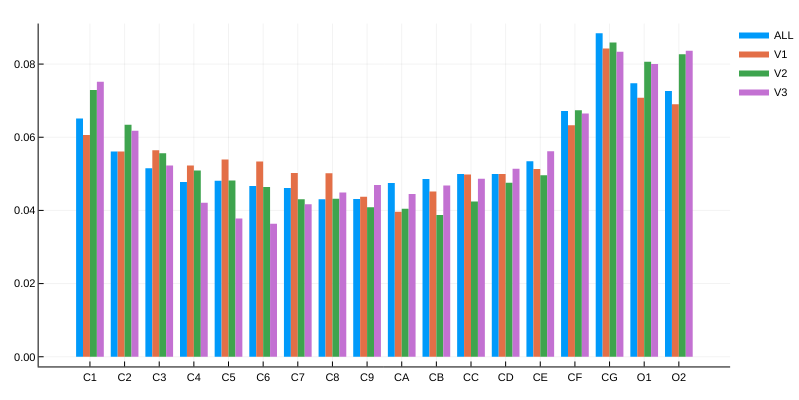

In [72]:
x_lig = repeat(name_lig_v1, outer = 4)
g_lig = repeat(["ALL" ; "V1" ; "V2" ; "V3"], inner = length(mask_lig))

groupedbar(x_lig, hcat(dens_lig_full, dens_lig_v1, dens_lig_v2, dens_lig_v3),
    bar_position = :dodge, linecolor = false, size = (750, 400),
    group = g_lig)

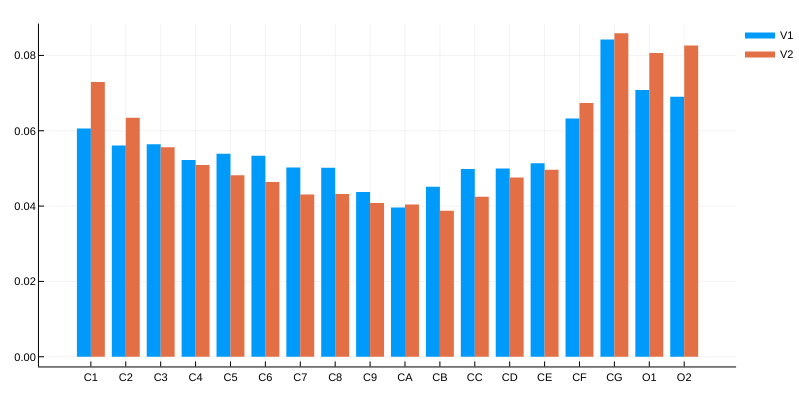

In [73]:
x_lig = repeat(name_lig_v1, outer = 2)
g_lig = repeat([ "V1" ; "V2" ], inner = length(mask_lig))

groupedbar(x_lig, hcat(dens_lig_v1, dens_lig_v2),
    group = g_lig, 
    bar_position = :dodge, linecolor = false, size = (750, 400))

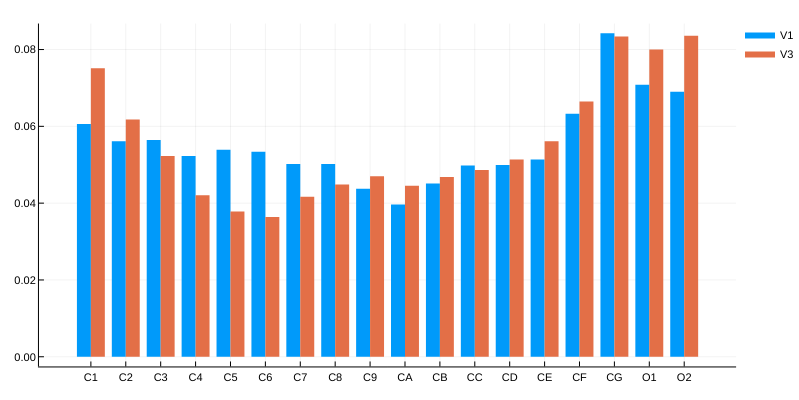

In [74]:
x_lig = repeat(name_lig_v1, outer = 2)
g_lig = repeat([ "V1" ; "V3" ], inner = length(mask_lig))

groupedbar(x_lig, hcat(dens_lig_v1, dens_lig_v3),
    group = g_lig,
    bar_position = :dodge, linecolor = false, size = (750, 400))

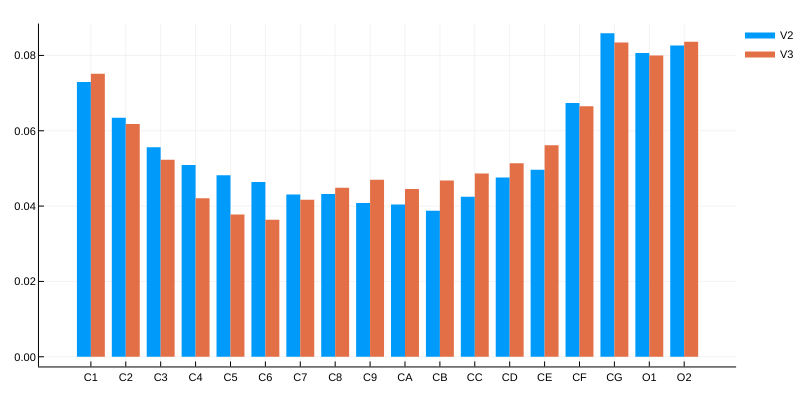

In [76]:
x_lig = repeat(name_lig_v1, outer = 2)
g_lig = repeat([ "V2" ; "V3" ], inner = length(mask_lig))

groupedbar(x_lig, hcat(dens_lig_v2, dens_lig_v3),
    group = g_lig,
    bar_position = :dodge, linecolor = false, size = (750, 400))

In [70]:
hcat(dens_lig_v2, dens_lig_v3)

3×2 Array{Float64,2}:
 0.299684  0.300547
 0.497413  0.493428
 0.202903  0.206025